# <font color='blue'>Flights Project</font>

## Introduction

This dataset reported 1539 flights in United States in december 2020. The data attributes are carriers, arrival and departure delays, and reasons for delays, year, moth flights cancel and other factors.
Dataset was downloaded [Bureau of Transportation Statistics](https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp?pn=1).

Below is displayed columns' meaning.


Variable    |   Description
:----------- | :-----------
**year** | 2020
**month** | 12
**carrier** | Company name acronym (airline carrier abbreviation)
**carrier_name** | Company name
**airport** | Airport Code 
**airport_name** | Whole airport name
**arr_flights**| Total number of arriving flights in the observation
**arr_del15** | Total number of delayed flights in the observation  
**carrier_ct** | Number of flights delayed due to air carrier (e.g. maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.).
**weather_ct** | Number of flights delayed due to weather.
**nas_ct** | Number of flights delayed due to National Aviation System (e.g. non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control).
**security_ct** | Number of flights delayed due to security (e.g. evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas).
**late_aircraft_ct**| Number of flights delayed due to a previous flight using the same aircraft being late.
**arr_cancelled**|Arrival cancelled, in minutes 
**arr_diverted** | Arrival diverted (Number of flights diverted) , in minutes
**arr_delay** | Arrival delay, in minutes
 **carrier_delay** | In minutes, retraso del operado 
**weather_delay**| Weather delayed in minutes
**nas_delay** | National Aviation System in minutes (subset of arr_delay),in minutes
**security_delay**| Security delay in minutes (subset of arr_delay) 
**late_aircraft_delay** | Aircraft delay in minutes (subset of arr_delay)
**Unnamed** | 21

**Objective**


Mainly target is obtain which airports have more arrives, arrive delay, security delay, weather_ct,carrier_ct, arr_cancelled during december. This analysis will help me to provide information to passangers. So, they can prevent their trips according to the airline they choose and being aware what kind of problem would have in some airports. In addition, I will plot on time performance National during december 2020.



## Preliminary Wrangling

<span style="color:blue"> Import important libraries</span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


+ <span style="color:blue">Loading the dataset into a pandas dataframe and called _**df**_.</span>
+ <span style="color:blue"> Opening the first 3 lines in order to seen the data.</span>


In [2]:
df=pd.read_csv('413475143_122020_4356_airline_delay_causes.csv')
df.head(3)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Unnamed: 21
0,2020,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",44.0,3.0,1.63,0.0,...,1.25,0.0,1.0,89.0,56.0,0.0,3.0,0.0,30.0,NaN
1,2020,12,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",90.0,1.0,0.96,0.0,...,0.00,0.0,0.0,23.0,22.0,0.0,1.0,0.0,0.0,NaN
2,2020,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,8.0,5.75,0.0,...,0.65,0.0,1.0,338.0,265.0,0.0,45.0,0.0,28.0,NaN


<span style="color:blue"> Let's explore the dataset  which will be useful to know some caracteristics such as shape, data type, columns' name,  and info(). Those commands provide a high-level overview of the dataset.</span>


In [3]:
print(df.shape)
print(df.dtypes)

(1539, 22)
year                     int64
 month                   int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
 weather_ct            float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
 arr_delay             float64
 carrier_delay         float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
Unnamed: 21            float64
dtype: object


<span style="color:blue"> There are 22 columns and 1539 data.In addition, there are four columns as object, two integer and the rests are float.</span>

<span style="color:blue"> The command columns give me the all column names and at the same time, I verified that my _**df**_ contains whole information.  </span>

df.columns

<span style="color:blue"> Command info() provided an overview of missing data and as I see, some columns are missing values.</span>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1539 non-null   int64  
 1    month               1539 non-null   int64  
 2   carrier              1539 non-null   object 
 3   carrier_name         1539 non-null   object 
 4   airport              1539 non-null   object 
 5   airport_name         1539 non-null   object 
 6   arr_flights          1532 non-null   float64
 7   arr_del15            1532 non-null   float64
 8   carrier_ct           1532 non-null   float64
 9    weather_ct          1532 non-null   float64
 10  nas_ct               1532 non-null   float64
 11  security_ct          1532 non-null   float64
 12  late_aircraft_ct     1532 non-null   float64
 13  arr_cancelled        1532 non-null   float64
 14  arr_diverted         1532 non-null   float64
 15   arr_delay           1532 non-null   f

<span style="color:blue">Using _**value_counts**_  which return a Series containing counts of unique values. So, I can confirm that 'Year' column is focus only in 2020. Remember, I'm doing this in order to explore all dataset.</span>


In [5]:
df.year.value_counts()

2020    1539
Name: year, dtype: int64

<span style="color:blue">Let's check how many airlines are in my dataset. So, the command value_counts will help.</span>


In [6]:
df.carrier_name.value_counts()

SkyWest Airlines Inc.     226
Envoy Air                 132
Allegiant Air             119
Endeavor Air Inc.         117
Delta Air Lines Inc.      107
Mesa Airlines Inc.         99
Southwest Airlines Co.     93
PSA Airlines Inc.          93
Republic Airline           93
Frontier Airlines Inc.     92
American Airlines Inc.     89
United Air Lines Inc.      87
Alaska Airlines Inc.       72
JetBlue Airways            56
Spirit Air Lines           46
Hawaiian Airlines Inc.     18
Name: carrier_name, dtype: int64

<span style="color:blue"> To confirm that I will analyse december (12).</span>
.

In [7]:
df[' month'].value_counts()

12    1539
Name:  month, dtype: int64

<span style="color:blue">Carrier column means the company name acronym (airline carrier abbreviation). I how many airline acronym there are.</span>


In [8]:
df.carrier.value_counts()

OO    226
MQ    132
G4    119
9E    117
DL    107
YV     99
OH     93
YX     93
WN     93
F9     92
AA     89
UA     87
AS     72
B6     56
NK     46
HA     18
Name: carrier, dtype: int64

<span style="color:blue"> Descriptive statistics for numeric variables provide useful information in this case I will focus in minimum and maximum values. So, these give an overview what I expect to see in my graphs.</span>


In [9]:
print(df.describe())

         year   month   arr_flights    arr_del15   carrier_ct   weather_ct  \
count  1539.0  1539.0   1532.000000  1532.000000  1532.000000  1532.000000   
mean   2020.0    12.0    242.400131    28.415144    11.239145     1.085685   
std       0.0     0.0    681.522291    83.326246    31.400960     4.286483   
min    2020.0    12.0      1.000000     0.000000     0.000000     0.000000   
25%    2020.0    12.0     31.000000     3.000000     1.000000     0.000000   
50%    2020.0    12.0     69.000000     8.000000     3.350000     0.000000   
75%    2020.0    12.0    168.250000    21.000000     9.055000     0.990000   
max    2020.0    12.0  12420.000000  1286.000000   697.000000    77.000000   

            nas_ct  security_ct  late_aircraft_ct  arr_cancelled  \
count  1532.000000  1532.000000       1532.000000    1532.000000   
mean     10.084347     0.118649          5.887369       2.513055   
std      38.973915     0.659466         17.821869       7.457291   
min       0.000000     0.

<span style="color:Blue">Exploring _**Unnamed: 21**_ column and what kind of data has.</span>

In [10]:
print('Unique values:',df['Unnamed: 21'].nunique())
df['Unnamed: 21'][156:456]

Unique values: 0


156   NaN
157   NaN
158   NaN
159   NaN
160   NaN
       ..
451   NaN
452   NaN
453   NaN
454   NaN
455   NaN
Name: Unnamed: 21, Length: 300, dtype: float64

<span style="color:blue"> As I can observe whole column has NAN and it doesn't have unique values.</span>

<span style="color:BLUE"> Let's check if our dataset has duplicate values.</span>

In [11]:
df.duplicated().value_counts()

False    1539
dtype: int64

<span style="color:BLUE"> How many airports are registers into the dataset.</span>

In [12]:
df.airport.value_counts()

BNA    15
PIT    15
MSY    14
CLE    14
DTW    14
       ..
GRK     1
BGM     1
ASE     1
HOB     1
MKG     1
Name: airport, Length: 349, dtype: int64

### <span style="color:darkviolet">**Brief Summary** </span>


<span style="color:darkviolet">**Exploring the dataset will help to understand the meaning of each columns and seeing some characteristics which give an overview.** </span>

## Cleaning some data

<span style="color:blue"> Before makes modification in my original dataset. Let's done a copy and do all corrections into new dataframe called _**df_copy**_</span>

In [13]:
df_copy=df.copy()

<span style="color:blue"> In our my _**Preliminary Wrangling**_ I confirmed that _**Unnamed**_ column only has _**NAN**_. So, it doesn't provide useful information. Therefore, I will drop it.</span>

+ <span style="color:Blue"> To more reference of command _**drop()**_ check [HERE](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)</span>


In [14]:
df_copy=df_copy.drop('Unnamed: 21', axis=1)

<span style="color:blue"> Using the commands _**columns**_ and _**info**_ let's verify if I dropped it correctly the column. </span>

In [15]:
df_copy.columns

Index(['year', ' month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [16]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1539 non-null   int64  
 1    month               1539 non-null   int64  
 2   carrier              1539 non-null   object 
 3   carrier_name         1539 non-null   object 
 4   airport              1539 non-null   object 
 5   airport_name         1539 non-null   object 
 6   arr_flights          1532 non-null   float64
 7   arr_del15            1532 non-null   float64
 8   carrier_ct           1532 non-null   float64
 9    weather_ct          1532 non-null   float64
 10  nas_ct               1532 non-null   float64
 11  security_ct          1532 non-null   float64
 12  late_aircraft_ct     1532 non-null   float64
 13  arr_cancelled        1532 non-null   float64
 14  arr_diverted         1532 non-null   float64
 15   arr_delay           1532 non-null   f

<span style="color:blue"> I will remove missing values of the column _**arr_flights**_ using the dropna command.</span>

+ <span style="color:BLUE">To more information of dropna command clik [HERE](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)</span>




In [17]:
df_copy= df_copy.dropna(subset = ['arr_flights'])

 <span style="color:Blue"> Just using _**dropna**_ in my entire dataframe in order to verify that I don't have any NAN.</span>

In [18]:
df_copy=df_copy.dropna()

<span style="color:Blue"> Verifying if the dataset are completely.</span>

In [19]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 1538
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 1532 non-null   int64  
 1    month               1532 non-null   int64  
 2   carrier              1532 non-null   object 
 3   carrier_name         1532 non-null   object 
 4   airport              1532 non-null   object 
 5   airport_name         1532 non-null   object 
 6   arr_flights          1532 non-null   float64
 7   arr_del15            1532 non-null   float64
 8   carrier_ct           1532 non-null   float64
 9    weather_ct          1532 non-null   float64
 10  nas_ct               1532 non-null   float64
 11  security_ct          1532 non-null   float64
 12  late_aircraft_ct     1532 non-null   float64
 13  arr_cancelled        1532 non-null   float64
 14  arr_diverted         1532 non-null   float64
 15   arr_delay           1532 non-null   f

### <span style="color:darkviolet">**Brief Summary** </span>


<span style="color:darkviolet">**I cleaned missing values and drop some columns because it was not necessary to my analysis
    I also used some sources that allow me to undestand how to use the commands.** </span>

## Data visualization

### Univariate Exploration


#### <span style="color:orange"> How many airline companies are in the dataset</span>


+ <span style="color:blue">Plotting multiple columns using a fuction. The main focus columns are non numeric variables: *carrier and airport*</span>

+ <span style="color:blue">First, I'm going to build the function plot_multiple_histograms for two specific columns. [HERE](https://www.justintodata.com/how-to-use-python-seaborn-for-exploratory-data-analysis/) is page where you can find more example how to do it.</span>


In [20]:
import math

In [21]:
def plot_multiple_countplots(df_copy, cols, title):
    num_plots = len(cols)
    num_cols = math.ceil(np.sqrt(num_plots))
    num_rows = math.ceil(num_plots/num_cols)
   
        
    fig, axs = plt.subplots(num_rows, num_cols, figsize=[ 11.69, 8.27])
    plt.title(title, fontsize=25)
    plt.xlabel(num_rows, fontsize=20)
    plt.ylabel(num_cols, fontsize=20)
    
    
    for ind, col in enumerate(cols):
        i = math.floor(ind/num_cols)
        j = ind - i*num_cols
        if num_rows == 1:
            if num_cols == 1:
                sns.countplot(x=df_copy[col], ax=axs)
            else:
                sns.countplot(x=df_copy[col], ax=axs[j])
        else:
            sns.countplot(x=df_copy[col], ax=axs[i, j])

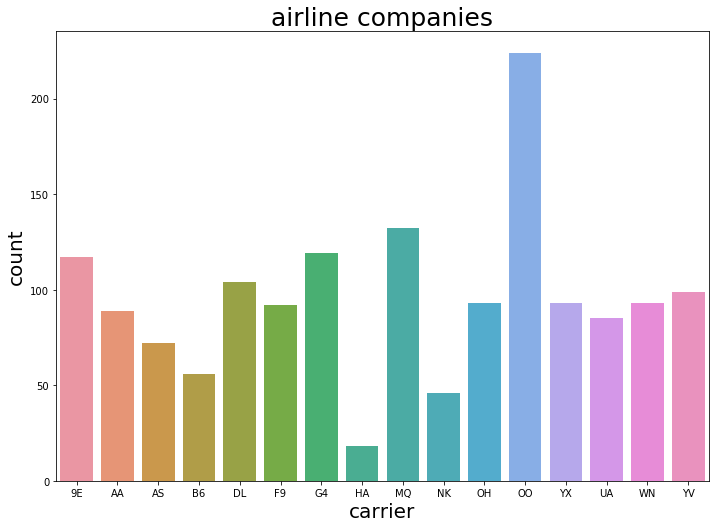

In [22]:
plot_multiple_countplots(df_copy, ['carrier'], 'airline companies');

 <span style="color:blue"> As I observed the company OO (SkyWest Airlines, Inc) predominates on US flights follow by MQ (Envoy Air) accounting for almost 150. The HA (Hawaiian Airlines) is the lowest airline which had fewer flights.</span>

#### <span style="color:orange"> Count of airports</span>
 
+ <span style="color:blue"> Airport column is a string. However, using my fuction looks quite mess. So, I'm going to plot it using individually just for the first and last 10 airports.</span>

Text(0, 0.5, 'Count')

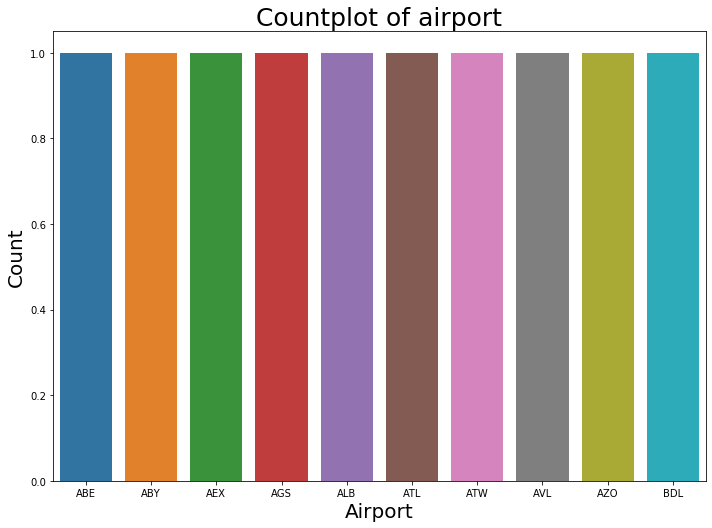

In [23]:
df_non_numeric = df_copy.select_dtypes(exclude='number')
df_non_numeric=df_non_numeric.head(10)

plt.figure(figsize=( 11.69, 8.27))
sns.countplot(x="airport", data=df_non_numeric)
plt.title('Countplot of airport', fontsize=25)
plt.xlabel('Airport', fontsize=20)
plt.ylabel('Count', fontsize=20)

 <span style="color:blue"> I read the [how to modify fontsize](https://www.delftstack.com/es/howto/matplotlib/how-to-set-the-figure-title-and-axes-labels-font-size-in-matplotlib/)</span>

Text(0, 0.5, 'Count')

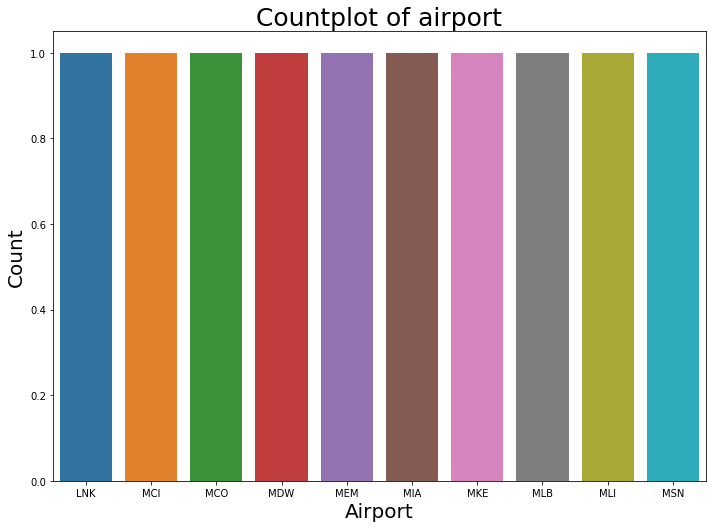

In [24]:
df_non_numeric = df_copy.select_dtypes(exclude='number')
df_non_numeric=df_non_numeric.tail(10)

plt.figure(figsize=( 11.69, 8.27))
sns.countplot(x="airport", data=df_non_numeric);
plt.title('Countplot of airport', fontsize=25)
plt.xlabel('Airport', fontsize=20)
plt.ylabel('Count', fontsize=20)

 <span style="color:blue"> It was expected that there is no airport with the same name.</span>

#### <span style="color:orange"> **Plotting of nas_ct column**</span>

+ <span style="color:blue"> Plotting a histogram in orden to have an overview of **nas_ct** column which is the number of flights delayed due to National Aviation System (e.g. non-extreme weather conditions, airport operations, heavy traffic volume, and air traffic control).</span>



In [25]:
def plot_multiple_hist(df_copy, col):
    bins = np.arange(0, df_copy[col].max())
    plt.figure(figsize=( 11.69, 8.27))

    plt.hist(data = df_copy, x = col, color='orange', edgecolor='black');
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Count', fontsize=20)

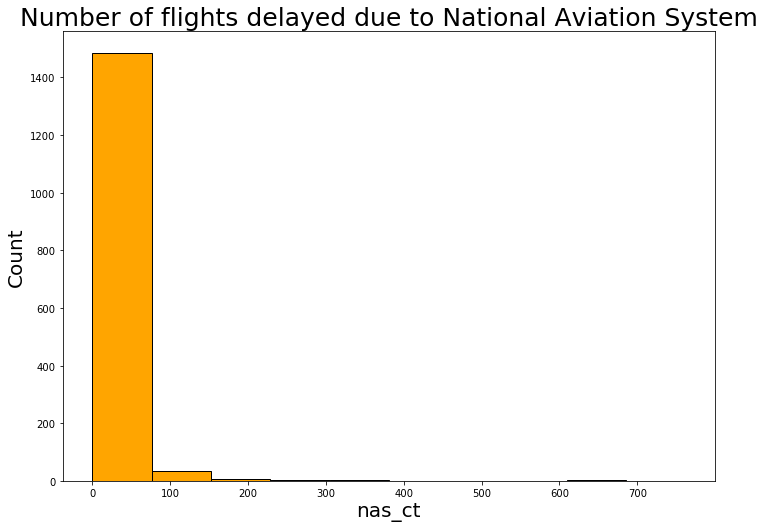

In [26]:
plot_multiple_hist(df_copy, 'nas_ct');
plt.title('Number of flights delayed due to National Aviation System', fontsize=25);

In [27]:
df_copy.nas_ct.max()

761.79

 <span style="color:blue">As I can observe, there are a lot of zero's and the max value is accounting for 761.79. So, it means that it had several number of flights delayed due to National Aviation System.</span>


#### <span style="color:orange"> **Plot the late_aircraft_delay column**</span>


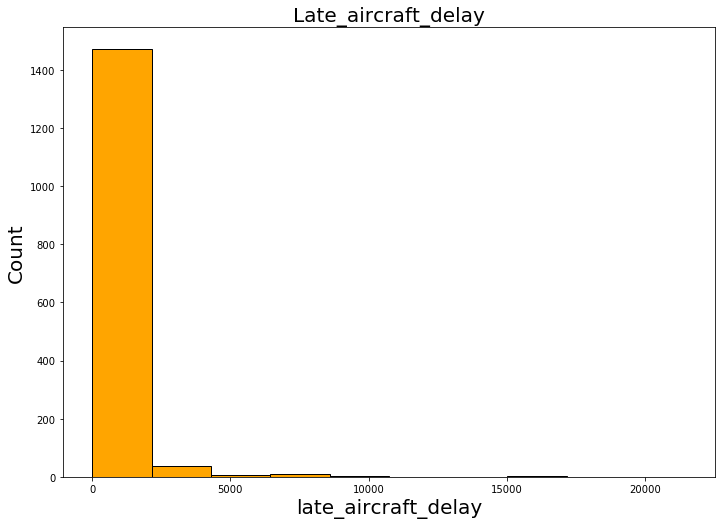

In [28]:
plot_multiple_hist(df_copy, 'late_aircraft_delay');
plt.title('Late_aircraft_delay', fontsize=20);

In [29]:
df_copy.late_aircraft_delay.max()

21472.0

<span style="color:blue"> 21472 Aircraft delays were registered in december 2020. So, many flights had to wait a lot time for this reason. </span>


### **Bivariate Exploration**

#### <span style="color:orange">**Airport with more arrive flights** </span>


<span style="color:blue"> I will focus in the first 10 airport with more arrival and I will define funtions which will help to plot easier. I will call them later as well.</span>


+ <span style="color:blue">Selecting the columns airport and arr_flights in order to create a table and extract the important information. </span>
+ <span style="color:blue">I will plot a pie chart fot better understanding. </span> 
+ <span style="color:blue">To pie chart I based on both links [HERE](https://datatofish.com/pie-chart-matplotlib/) and [HERE](https://www.w3schools.com/python/matplotlib_pie_charts.asp)</span>


In [30]:
def plot_pie_chart_top10(df_copy, col,name):
    table=df_copy[['airport','airport_name',col]]
    top_ten=table.sort_values(by=[col],ascending=False).head(10)
    total=top_ten[col].sum()
    top_ten['percentage']=((top_ten[col])/(total))*100
    data=top_ten['percentage']
    my_labels=top_ten['airport']
    plt.figure(figsize=( 11.69, 8.27))
    plt.pie(data,labels=my_labels,autopct='%1.1f%%')
    plt.title(name, fontsize=20)
    plt.axis('equal')
    plt.show()

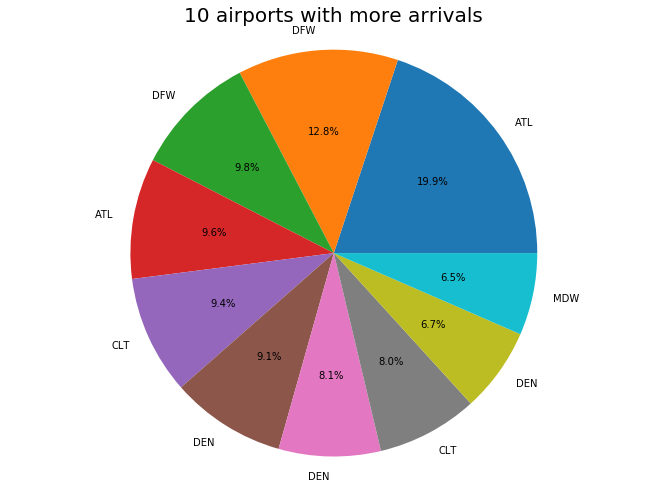

In [31]:
plot_pie_chart_top10( df_copy,'arr_flights','10 airports with more arrivals');

<span style="color:blue">I'm going to plot a bar to have better overview. In this case I just plot the first 5 position. </span>

In [32]:
def plot_bar_top10(df_copy, col,title,name_y):
    table=df_copy[['airport','airport_name',col]]
    top_ten=table.sort_values(by=[col],ascending=False).head(10)
    total=top_ten[col].sum()
    top_ten['percentage']=((top_ten[col])/(total))*100
    plt.figure(figsize=( 11.69, 8.27))
    plt.bar(top_ten['airport'],top_ten['percentage'], color='darkblue')
    plt.title(title, fontsize=20)
    plt.xlabel('Airport', fontsize=20)
    plt.ylabel(name_y, fontsize=20)
    plt.show()

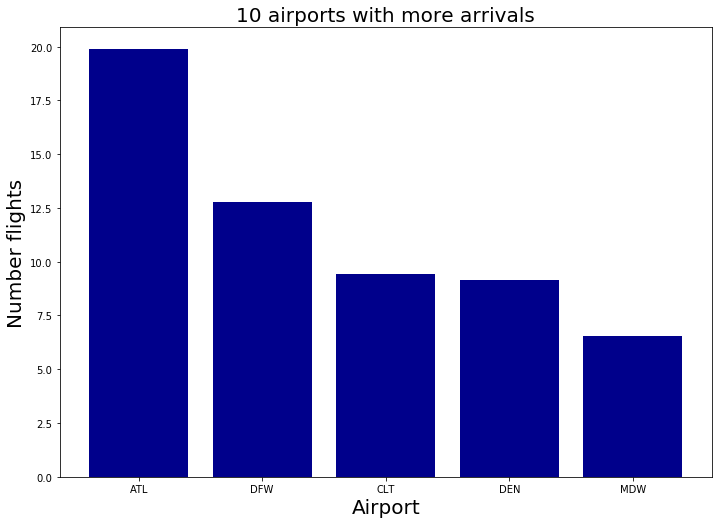

In [33]:
plot_bar_top10(df_copy,'arr_flights','10 airports with more arrivals','Number flights')

<span style="color:BLUE"> I confirmed with pie chart and bar chart that the airports which had more arrived flights were: ATL (Atlanta International) with 19% follow by DFW (Dallas/Fort Worth International Airport) BY 12.8%.</span>

#### <span style="color:orange"> **Airports with least arrive flights**</span>

+ <span style="color:blue"> Here, I just want to identify which airport had few flights number.</span>

In [34]:
def less_issues(df_copy, col):
    table=df_copy[['airport','airport_name',col]]
    less=table.sort_values(by=[col],ascending=True).head(10)
    return less

In [35]:
less_issues(df_copy,'arr_flights')

,airport,airport_name,arr_flights
1082,JAN,"Jackson/Vicksburg, MS: Jackson Medgar Wiley Ev...",1.0
1051,FLL,"Fort Lauderdale, FL: Fort Lauderdale-Hollywood...",1.0
495,MYR,"Myrtle Beach, SC: Myrtle Beach International",1.0
451,BTV,"Burlington, VT: Burlington International",1.0
85,MSY,"New Orleans, LA: Louis Armstrong New Orleans I...",1.0
191,SAV,"Savannah, GA: Savannah/Hilton Head International",1.0
1440,MOB,"Mobile, AL: Mobile Regional",1.0
1105,MBS,"Saginaw/Bay City/Midland, MI: MBS International",1.0
1425,HSV,"Huntsville, AL: Huntsville International-Carl ...",1.0
1157,ROC,"Rochester, NY: Greater Rochester International",1.0


<span style="color:blue">As we can observe regional airport just had one arrival during december.So,its do not need a plot because all are one.</span>



#### <span style="color:orange">**Which airports do have arrival delay?**</span>


+ <span style="color:blue">Remember that arr_delay column is given  in minutes.So, To better understanding I will transform _**arr_delay**_ in minutes to hours. colecting all information about the airports and looking for more details.</span>
+ <span style="color:blue"> Plotting airport VS delay_hr column. To more information how to plot it, click [HERE](https://datatofish.com/bar-chart-python-matplotlib/)</span>

In [36]:
def plot_bar_top_hour(df_copy, col,title,name_y):
    table=df_copy[['airport','airport_name',col]]
    delay=table.sort_values(by=[col],ascending=False).head(10)
    delay['delay_hr']=(delay[col])/(60)
    plt.figure(figsize=( 11.69, 8.27))
    plt.bar(delay['airport'],delay['delay_hr'], color='darkblue')
    plt.title(title, fontsize=20)
    plt.xlabel('Airport', fontsize=20)
    plt.ylabel(name_y, fontsize=20)
    plt.show()

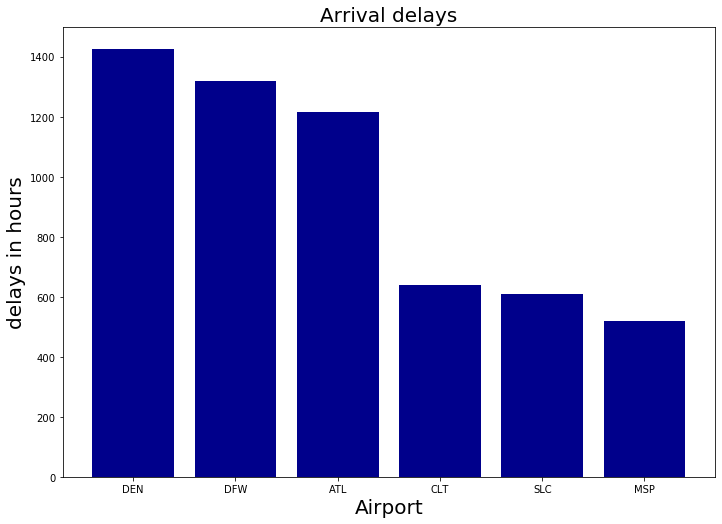

In [37]:
plot_bar_top_hour(df_copy,' arr_delay','Arrival delays','delays in hours')

<span style="color:BLUE">During december the aiport  DEN (Denver, CO: Denver International) had arrival delays accounting by almost 1426.25 h follow by DFW and ATL by almost 1318.96 and 1214.21 hours.</span>

#### <span style="color:orange"> **Which airports do have least arrival delays?**</span>
+ <span style="color:BLUE"> Let's check which airport had least arrived delays during december.</span>

In [38]:
less_issues(df_copy,' arr_delay')

,airport,airport_name,arr_delay
1401,CID,"Cedar Rapids/Iowa City, IA: The Eastern Iowa",0.0
481,JAX,"Jacksonville, FL: Jacksonville International",0.0
161,LIH,"Lihue, HI: Lihue Airport",0.0
162,MCI,"Kansas City, MO: Kansas City International",0.0
77,MIA,"Miami, FL: Miami International",0.0
1266,PWM,"Portland, ME: Portland International Jetport",0.0
166,MKE,"Milwaukee, WI: General Mitchell International",0.0
1271,ROC,"Rochester, NY: Greater Rochester International",0.0
488,MDT,"Harrisburg, PA: Harrisburg International",0.0
72,MCI,"Kansas City, MO: Kansas City International",0.0


<span style="color:BLUE">There are several airport without arriving delay during december.</span>

#### <span style="color:orange">**Which airports do have more incidents according to security delay?**</span>


+ <span style="color:BLUE"> My main goal is to gather information about which airport had more and least troubles and one of them is security delay.</span>

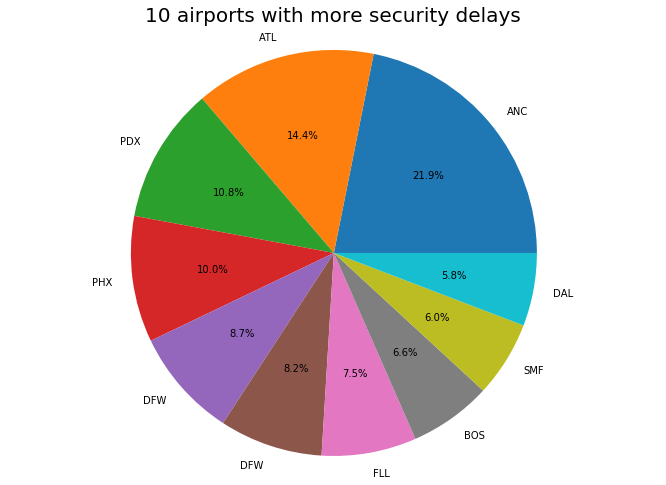

In [39]:
plot_pie_chart_top10( df_copy,'security_delay','10 airports with more security delays');

In [40]:
df_copy.security_delay.describe()

count    1532.000000
mean        4.552219
std        25.672647
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       553.000000
Name: security_delay, dtype: float64

<span style="color:BLUE">According with the table before, the maximum value is 553 delays due to security. However, some airports were on time without any security  delays. I could confirm with the minimum value which is _**zero**_</span>

+ <span style="color:blue">I will plot the top 10 airport with more security delays.</span>
+ <span style="color:blue"> As we can observe from our dataframe the column security_delay are in minutes. So, I'm going to convert to hours.</span>

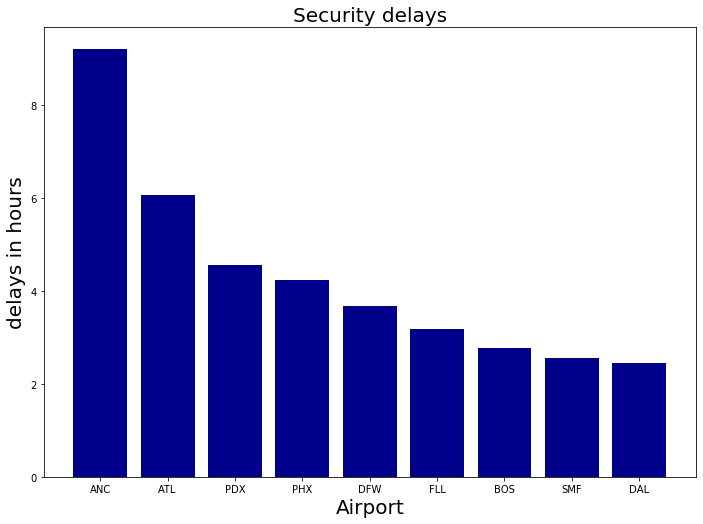

In [41]:
plot_bar_top_hour(df_copy,'security_delay','Security delays','delays in hours')

<span style="color:Blue">Ted Stevens Anchorage International Airport (ANC) had almost 10 h delays due to security follow by ATL accounting by 6 hours. </span>

#### <span style="color:orange"> **Which do airports have least incidents according to security delay?**</span>

+ <span style="color:blue">In order to create a vast information for the passager I need to know which airport had least or any inccident due to security delay.</span>

In [42]:
less_issues(df_copy,'security_delay')

,airport,airport_name,security_delay
0,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",0.0
1013,CID,"Cedar Rapids/Iowa City, IA: The Eastern Iowa",0.0
1012,CHS,"Charleston, SC: Charleston AFB/International",0.0
1011,CHA,"Chattanooga, TN: Lovell Field",0.0
1010,CGI,"Cape Girardeau, MO: Cape Girardeau Regional",0.0
1009,CDC,"Cedar City, UT: Cedar City Regional",0.0
1008,BZN,"Bozeman, MT: Bozeman Yellowstone International",0.0
1007,VPS,"Valparaiso, FL: Eglin AFB Destin Fort Walton B...",0.0
1006,TYS,"Knoxville, TN: McGhee Tyson",0.0
1014,CIU,"Sault Ste. Marie, MI: Chippewa County Internat...",0.0


In [43]:
df_copy.security_delay.describe()

count    1532.000000
mean        4.552219
std        25.672647
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       553.000000
Name: security_delay, dtype: float64

<span style="color:blue"> Some airports don't present any case of security delay.</span>

#### <span style="color:orange">**Which airports do have delays due to weather?**</span>

+ <span style="color:blue"> We must remember that weather_delay is in minutes. So, its display will be converted into hours. This analysis allow to know which airports had retarded due to weather. Whole information will be important to provide a vast information about which airports has more issues.</span> 

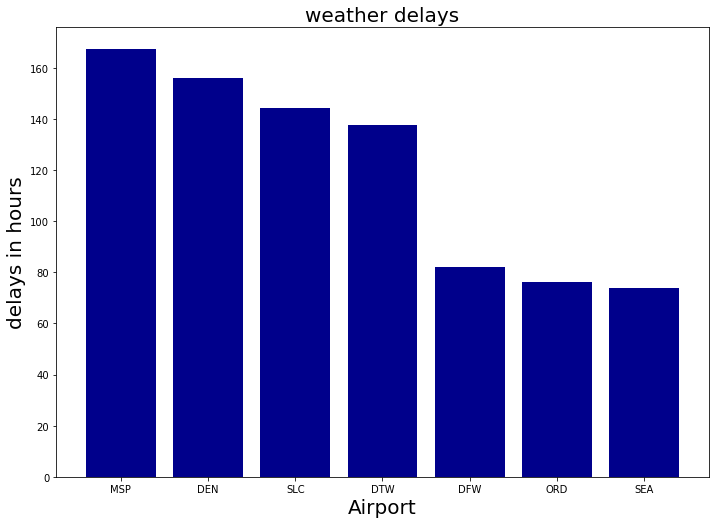

In [44]:
plot_bar_top_hour(df_copy,'weather_delay','weather delays','delays in hours')

In [45]:
weather_cause=df_copy[['airport','airport_name','weather_delay']]
weather_prob=weather_cause.sort_values(by=['weather_delay'],ascending=False).head(10)
weather_prob['weather_hr']=(weather_prob.weather_delay)/60

Text(0, 0.5, 'delays')

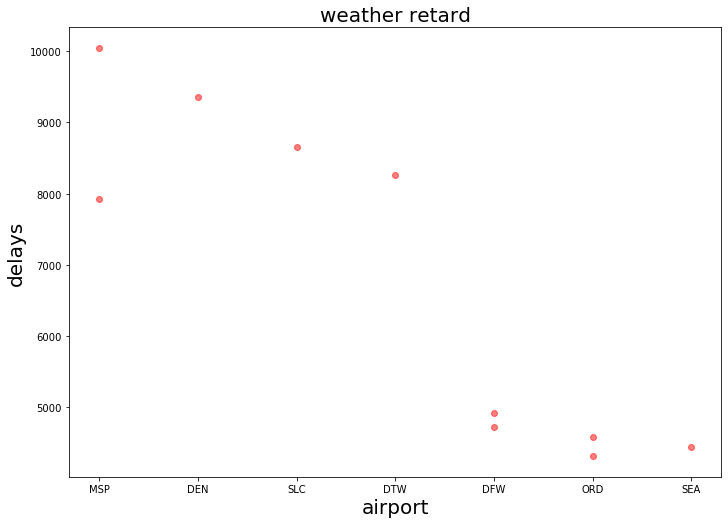

In [46]:
plt.figure(figsize=( 11.69, 8.27))
plt.scatter((weather_prob['airport']), weather_prob['weather_delay'], alpha = 0.5, marker = 'o' , color='red')
plt.title('weather retard', fontsize=20)
plt.xlabel('airport', fontsize=20)
plt.ylabel('delays',fontsize=20)


<span style="color:BLUE"> The airports MSP, DEN, SLC and DTW had many setback due to weather, which make sense with the airports with more arrive flights.</span>

#### <span style="color:ORANGE"> **Airports with least delayed due to weather**</span>


In [47]:
less_issues(df_copy,'weather_delay')

,airport,airport_name,weather_delay
0,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",0.0
879,ERI,"Erie, PA: Erie International/Tom Ridge Field",0.0
880,EWN,"New Bern/Morehead/Beaufort, NC: Coastal Caroli...",0.0
881,EWR,"Newark, NJ: Newark Liberty International",0.0
882,FAY,"Fayetteville, NC: Fayetteville Regional/Granni...",0.0
883,FNT,"Flint, MI: Bishop International",0.0
885,FWA,"Fort Wayne, IN: Fort Wayne International",0.0
886,GNV,"Gainesville, FL: Gainesville Regional",0.0
887,GPT,"Gulfport/Biloxi, MS: Gulfport-Biloxi Internati...",0.0
888,GRR,"Grand Rapids, MI: Gerald R. Ford International",0.0


<span style="color:BLUE">Those airports matched with the airports which hadn't any inccident about security or which had least flights.</span>

#### <span style="color:ORANGE">**Airports with some problems due to air carrier**</span>

+ <span style="color:BLUE">For instances: maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc.</span>
+ <span style="color:blue">Analysis will be displayed as boxplot. I find information [HERE](https://purnasaigudikandula.medium.com/exploratory-data-analysis-beginner-univariate-bivariate-and-multivariate-habberman-dataset-2365264b751)</span> 



In [48]:
air_issue=df_copy[['airport','carrier_ct']]
carrier_issue=air_issue.sort_values(by=['carrier_ct'],ascending=False).head(10)
sum_c=carrier_issue.carrier_ct.sum()
carrier_issue['percentage']=((carrier_issue.carrier_ct)/(sum_c))*100

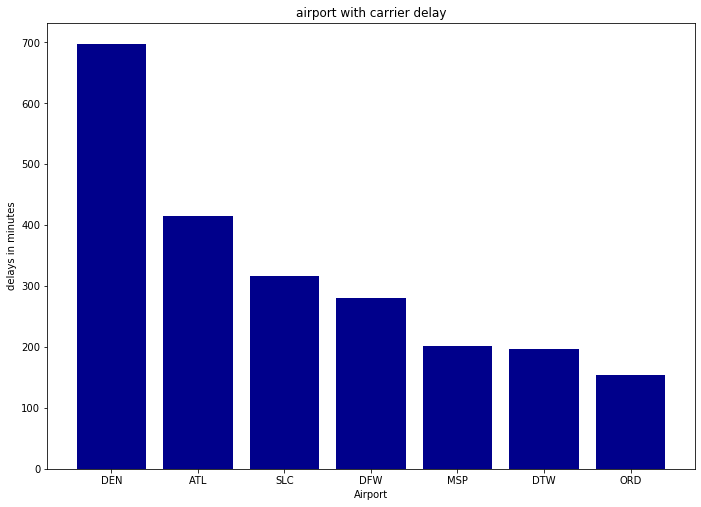

In [49]:
plt.figure(figsize=[ 11.6, 8.2]);
plt.bar(carrier_issue['airport'],carrier_issue['carrier_ct'], color='darkblue')
plt.title('airport with carrier delay')
plt.xlabel('Airport')
plt.ylabel('delays in minutes')
plt.show()

In [50]:
air_issue.carrier_ct.describe()

count    1532.000000
mean       11.239145
std        31.400960
min         0.000000
25%         1.000000
50%         3.350000
75%         9.055000
max       697.000000
Name: carrier_ct, dtype: float64

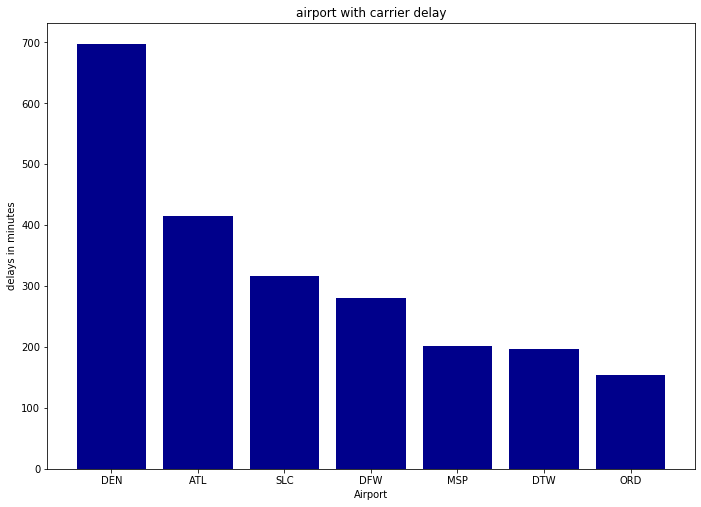

In [51]:
plt.figure(figsize=[ 11.6, 8.2]);
plt.bar(carrier_issue['airport'],carrier_issue['carrier_ct'], color='darkblue')
plt.title('airport with carrier delay')
plt.xlabel('Airport')
plt.ylabel('delays in minutes')
plt.show()

In [52]:
air_issue=df_copy[['airport','carrier_ct']]
carrier_issue=air_issue.sort_values(by=['carrier_ct'],ascending=False).head(10)
carrier_issue

,airport,carrier_ct
1032,DEN,697.00
337,ATL,414.32
1177,SLC,316.00
136,DFW,279.77
1121,MSP,202.00
1309,DEN,201.78
1037,DTW,196.00
1033,DFW,186.00
707,DFW,172.87
1128,ORD,154.00


<span style="color:blue">The airports which represent several issues were: Denver International Airport (DEN), Hartsfield–Jackson Atlanta International Airport (ATL) and Salt Lake City International Airport (SLC) accounting by 697,414 and 316 due to airline. Those retarsshould be maintenance or crew problems, aircraft cleaning, baggage loading, fueling, etc</span>


#### <span style="color:orange"> **Airports without issues due to carrier ct**</span>

+ <span style="color:blue"> Looking for some airlines which didn't have issues.</span>

In [53]:
less_issues(df_copy,'carrier_ct')

,airport,airport_name,carrier_ct
1538,MSN,"Madison, WI: Dane County Regional-Truax Field",0.0
1109,MFE,"Mission/McAllen/Edinburg, TX: McAllen Miller I...",0.0
1105,MBS,"Saginaw/Bay City/Midland, MI: MBS International",0.0
684,BNA,"Nashville, TN: Nashville International",0.0
700,COS,"Colorado Springs, CO: City of Colorado Springs...",0.0
701,COU,"Columbia, MO: Columbia Regional",0.0
1082,JAN,"Jackson/Vicksburg, MS: Jackson Medgar Wiley Ev...",0.0
1068,HOB,"Hobbs, NM: Lea County Regional",0.0
1062,GSP,"Greer, SC: Greenville-Spartanburg International",0.0
709,DTW,"Detroit, MI: Detroit Metro Wayne County",0.0


<span style="color:blue"> These result complemented the airports which didn't have incident according with security. There are many airport and airline which don't have any problem.</span>

#### <span style="color:orange"> **Airports with canceled flight arrivals**</span>


Here, I will look for the airports which more cancel flights arrivals. So, this step will provide useful information to find which airport has more troubles.

In [54]:
def plot_bar_(df_copy, col,title,name_y):
    table=df_copy[['airport',col]]
    top=table.sort_values(by=[col],ascending=False).head(10)
    plt.figure(figsize=( 11.69, 8.27))
    top.plot(kind='barh',x='airport',y=col, alpha = 0.8, color='darkblue')
    plt.title(title, fontsize=20)
    plt.xlabel(col,fontsize=20)
    plt.ylabel('airport',fontsize=20)
    plt.show()

<Figure size 841.68x595.44 with 0 Axes>

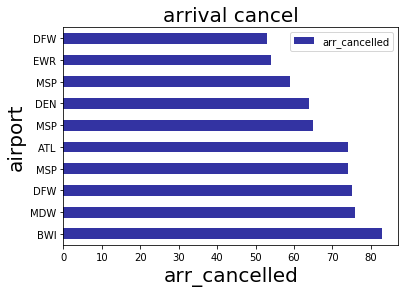

In [55]:
plot_bar_(df_copy,'arr_cancelled','arrival cancel','airport')

In [56]:
df_copy[['airport','arr_cancelled']].sort_values(by=['arr_cancelled'],ascending=False).head(10)


,airport,arr_cancelled
1300,BWI,83.0
1339,MDW,76.0
707,DFW,75.0
397,MSP,74.0
337,ATL,74.0
1121,MSP,65.0
1032,DEN,64.0
84,MSP,59.0
1224,EWR,54.0
136,DFW,53.0


<span style="color:blue"> BWI has 83 arrival cancel follow by MDW and BFW with 76 y 75 arrivals canceled.</span>

<span style="color:orange"> **Airports with least or without any  arrivals canceled**</span>

+ <span style="color:blue"> Let's see if there are some airport without arrived cancel.</span>


In [57]:
less_issues(df_copy,'arr_cancelled')

,airport,airport_name,arr_cancelled
0,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",0.0
601,MOT,"Minot, ND: Minot International",0.0
602,MRY,"Monterey, CA: Monterey Regional",0.0
603,MSO,"Missoula, MT: Missoula International",0.0
604,MSY,"New Orleans, LA: Louis Armstrong New Orleans I...",0.0
1129,ORF,"Norfolk, VA: Norfolk International",0.0
606,OGD,"Ogden, UT: Ogden-Hinckley",0.0
607,OKC,"Oklahoma City, OK: Will Rogers World",0.0
608,OMA,"Omaha, NE: Eppley Airfield",0.0
1127,ONT,"Ontario, CA: Ontario International",0.0


<span style="color:blue"> Some airports didn't have cancel arrivals.</span> 

### Multivariate Exploration

#### <span style="color:ORANGE">**On-Time Arrival Performance**</span>


+ <span style="color:BLUE">In orden to obtain the performance of arrival flights, air carrier delay, national aviation system delay, security delay,aircraft arriving late, cancel and diverted.</span> 
+ <span style="color:blue"> This [link](https://www.w3schools.com/python/matplotlib_pie_charts.asp)  was useful in order to create a piechart.
</span>


In [58]:
def plot_pie_chart_factors(df_copy, col1,col2,col3,col4,col5,col6,name):
    factors_del=df_copy[[col1,col2,col3,col4,col5,col6]]
    new_data=factors_del.sum()
    total_data=new_data.sum()
    per_data=(new_data/total_data)*100
    data_table=pd.DataFrame(data=new_data,columns=['Number of Operations'])
    data_table['% of Total Operations']=per_data
    
    plt.figure(figsize=( 11.69, 8.27))
    plt.pie(data_table['Number of Operations']);
    plt.legend(loc='center left',bbox_to_anchor=(1,0.5), labels=[f"{l}: {round(s,2)}%" for l , s in zip(data_table.index, 
            data_table["% of Total Operations"].values)], title= '% of Total Operations');
    plt.title(name, fontsize=25)

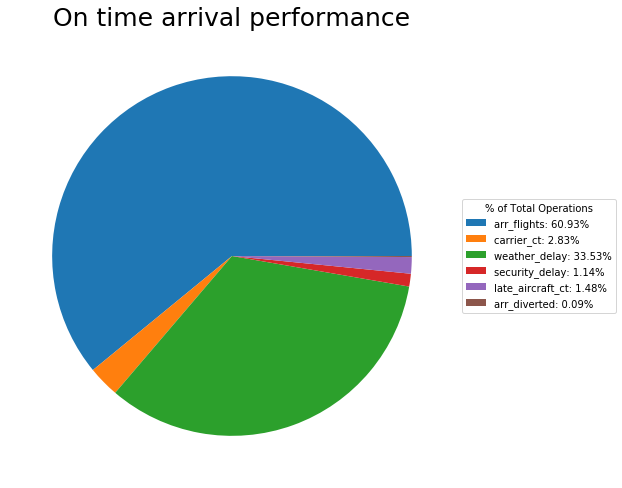

In [59]:
plot_pie_chart_factors(df_copy,'arr_flights','carrier_ct','weather_delay','security_delay','late_aircraft_ct','arr_diverted',
                      'On time arrival performance')

<span style="color:blue"> I want to see the dataframe. So, these [link](https://es.stackoverflow.com/questions/69288/resultados-de-una-function-en-un-dataframe-en-python)  and [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) provide useful information. </span>

In [60]:
def table(df_copy, col1,col2,col3,col4,col5,col6):
    factors_del=df_copy[[col1,col2,col3,col4,col5,col6]]
    new_data=factors_del.sum()
    total_data=new_data.sum()
    per_data=(new_data/total_data)*100
    data_table=pd.DataFrame(data=new_data,columns=['Number of Operations'])
    data_table['% of Total Operations']=per_data
    new_df=pd.DataFrame(data_table)
    return new_df

In [61]:
table(df_copy,'arr_flights','carrier_ct','weather_delay','security_delay','late_aircraft_ct','arr_diverted')

,Number of Operations,% of Total Operations
arr_flights,371357.00,60.930155
carrier_ct,17218.37,2.825093
weather_delay,204344.00,33.527607
security_delay,6974.00,1.144254
late_aircraft_ct,9019.45,1.479860
arr_diverted,567.00,0.093030


<span style="color:blue"> Arrive flights is 60% the total operations follow by weather which is the principal issue of delays.</span>

#### <span style="color:orange">**On time performace with the airline**</span>
+ <span style="color:blue"> Plotting the airline which has more flights and see its performance.</span>
+ <span style="color:blue"> _**value_count**_ showed the airlines which have more operations.</span>

In [62]:
df_copy.carrier.value_counts()

OO    224
MQ    132
G4    119
9E    117
DL    104
YV     99
OH     93
YX     93
WN     93
F9     92
AA     89
UA     85
AS     72
B6     56
NK     46
HA     18
Name: carrier, dtype: int64

+ <span style="color:blue"> Selecting the firts three airlines and seeing their performance. </span>
+ <span style="color:blue"> Let's create a function which will help to plot them easier.</span>

In [63]:
def airlines_performance(df_copy,x,col1,col2,col3,col4,col5,col6, title):
    airline=df_copy[df_copy['carrier']== x]
    airline=airline[[col1,col2,col3,col4,col5,col6]]
    suma=airline.sum()
    total=suma.sum()
    per_data=(suma/total)*100
    data_table=pd.DataFrame(data=suma,columns=['Number of Operations'])
    data_table['% of Total Operations']=per_data
    new_df=pd.DataFrame(data_table)
    
    plt.figure(figsize=( 11.69, 8.27))
    plt.pie(data_table['Number of Operations']);
    plt.legend(loc='center left',bbox_to_anchor=(1,0.5), labels=[f"{l}: {round(s,2)}%" for l , s in zip(data_table.index, 
            data_table["% of Total Operations"].values)], title= '% of Total Operations');
    plt.title(title, fontsize=25)

<span style="color:GREEN"> **SkyWest Airlines (OO)**</span>

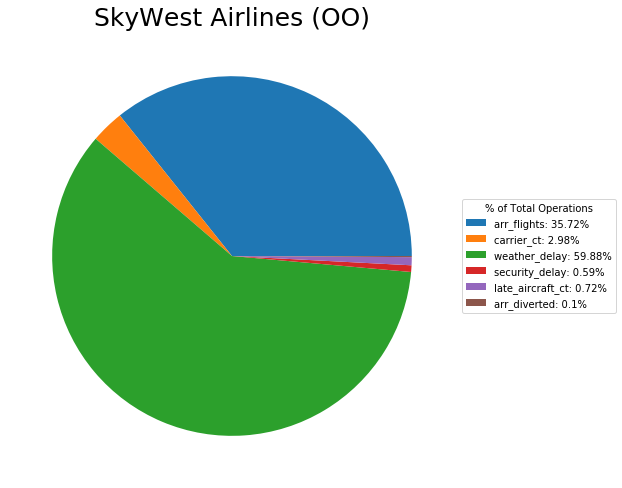

In [64]:
airlines_performance(df_copy,'OO','arr_flights','carrier_ct','weather_delay','security_delay','late_aircraft_ct','arr_diverted',
                    'SkyWest Airlines (OO)')

<span style="color:GREEN"> **Envoy Air (MQ)**</span>

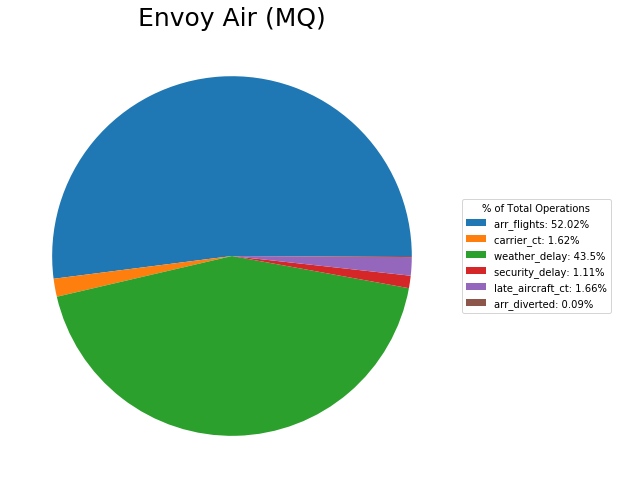

In [65]:
airlines_performance(df_copy,'MQ','arr_flights','carrier_ct','weather_delay','security_delay','late_aircraft_ct','arr_diverted',
                    'Envoy Air (MQ)')

<span style="color:GREEN"> **Allegiant Air (G4)**</span>

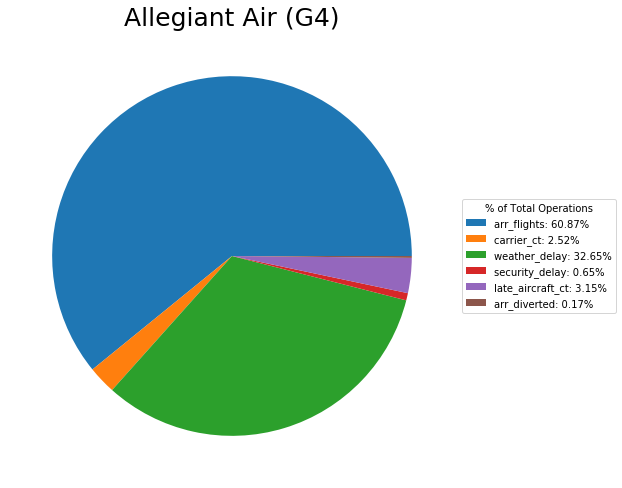

In [66]:
airlines_performance(df_copy,'G4','arr_flights','carrier_ct','weather_delay','security_delay','late_aircraft_ct','arr_diverted',
                    'Allegiant Air (G4)')

<span style="color:BLUE"> Allegiant Air (G4) got 60.80%  more arrive flights in compare with MQ y OO. However, SkyWest Airlines (OO) had 59.88% follow by Envoy Air (MQ) with 43.5% in delays due to weather. So, some airlines looks that have good services but two of them have more troubles with weather.</span>

#### <span style="color:orange"> **Let´s check with numerical variable**</span>

In [68]:
numerical_data=df_copy[['arr_flights','arr_del15', 'carrier_ct', ' weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       ' arr_delay', ' carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']]

Text(0.5, 1.0, 'arr_flights VS nas_delay')

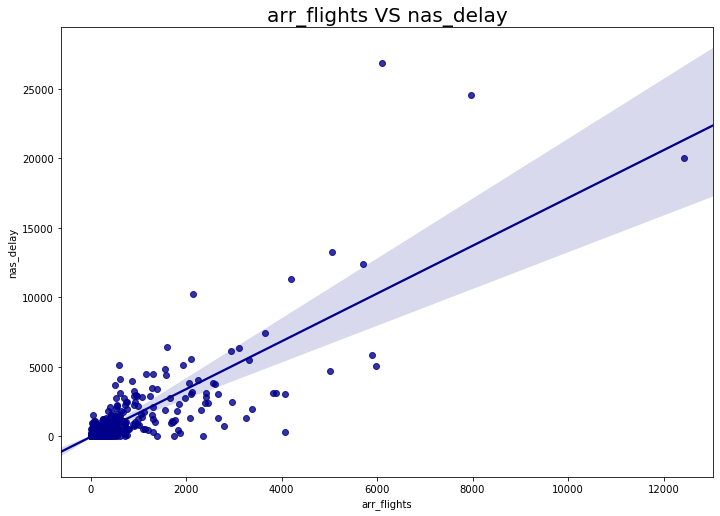

In [69]:
plt.figure(figsize=( 11.69, 8.27))
sns.regplot(data=numerical_data, x='arr_flights', y='nas_delay', color='darkblue');
plt.title('arr_flights VS nas_delay', fontsize=20)

<span style="color:blue">Least flights is obviously that will be lest delays with NAS,. I can say that there are other factors which some flights could be affected such as: delay, delays due to carrier, weather nas, and security. So, there are many point lower which are more frecuent in some airport.</span>



Text(0.5, 1, 'Heatmap numerical data')

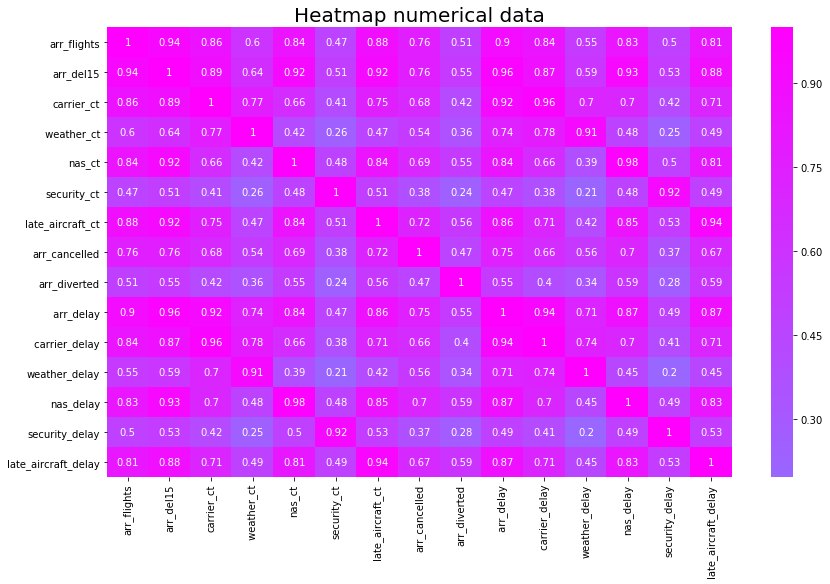

In [70]:
plt.figure(figsize=[14, 8.27]);
sns.heatmap(numerical_data.corr(), annot = True, cmap = 'cool', center = 0);
plt.title('Heatmap numerical data', fontsize=20)

<span style="color:BLUE"> The correlation cofficients indicate there might be correlations between the following pairs of variables:</span>
+ <span style="color:BLUE"> arr_delay, carrier_delay</span>
+ <span style="color:BLUE"> arr_del15, carrier_ct</span>
+ <span style="color:BLUE"> arr_flights,arr_del15</span>

## Conclusion


During whole analysis and visualization. I did some graphs the airports with more arrive flights, with more issues such as weather delay, carrier, air delay, security delay and arrives canceled.
As a result, I found that ATL ( Hartsfield–Jackson Atlanta International Airport) got 12420  flights and 1214.2 hours in arrive delay. 

In addition, this airport also had  6.06 h delayed due to security and 414.32 min delay due to air carrie. Finally, 74.0 min  due to arrive canceled. However, this airline didn't have any issues with weather.


Secondly, DFW International Airport (Dallas/Fort Worth International Airport) had a lot problems during december and at the same time received a lot flights during this month. For instance, 7959 flights arrived and 1318.96 h arrived delay. However, it had 3.6 h as security delay which is almost half in compare with ATL airport.  On the other hand, 4917 min as delay due to weather and 279.7 min due to air carrier. Finally, It had 75 min arrived cancel.

Thirdly,CLT (Charlotte Douglas International Airport) arrived 5890 flights and 639.4 h delays. However, It didn't figure in security  andweather delays, air carrier issues and arrive cancels.

These airports had setbacks during december and those issues are frequently found at international airports. 

Nevertheless, there are international airports which do not have any kind of problem during this month. For instance, I found JAN (Jackson-Medgar Wiley Evers International Airport) which had just 1 arrive flight and any issues due to air carrier. In fact, there are a lot international airports which do not have just one arrive flighs such as: FLL, MYR	SC, VT and MSY. 
In addition, some airports do not have arrive delay for instance:

+ CID	Cedar Rapids/Iowa City, IA: The Eastern Iowa	
+ JAX	Jacksonville, FL: Jacksonville International	
+ LIH	Lihue, HI: Lihue Airport	
+ MCI	Kansas City, MO: Kansas City International	
+ MIA	Miami, FL: Miami International	
+ PWM	Portland, ME: Portland International Jetport

Below I list the airports without any delay problem due to security.
+ ABE	Allentown/Bethlehem/Easton, PA: Lehigh Valley ...
+ CID	Cedar Rapids/Iowa City, IA: The Eastern Iowa	
+ CHS	Charleston, SC: Charleston AFB/International	
+ CHA	Chattanooga, TN: Lovell Field	

As well airports without any setbacks with weather delays:
+ ABE	Allentown/Bethlehem/Easton, PA: Lehigh Valley ...	
+ ERI	Erie, PA: Erie International/Tom Ridge Field	
+ EWN	New Bern/Morehead/Beaufort, NC: Coastal Caroli...	
+ EWR	Newark, NJ: Newark Liberty International	
+ FAY	Fayetteville, NC: Fayetteville Regional/Granni...	

Of course, there are some airports which didn't have air carrier issues to name few of them: MSN, MFE, MBS and 
BNA. In addition, it did not have arrived cancel during december in some airports. 
+ ABE	0.0
+ MOT	0.0
+ MRY	0.0
+ MSO	0.0
+ MSY	0.0
+ ORF	0.0
+ OGD	0.0

As I could observed, ABE (Lehigh Valley International Airport) was one of the best airport which did not have any problem. Nevertheless, it is the airport with least arrive, so this could be the reason that it doesn't present delays or setbacks.
 Therefore, whole analysis indicated that ATL, DFW AND CLT are the airports with more air traffic and popular. Then, this could be the main problem of arrive cancel, air carrier, security delay and so on. 

Finally, I found that on time arrival performance  are: 

+ arr_flights	60.9%
+ carrier_ct	2.8%
+ weather_delay 33.5%
+ security_delay	1.1%
+ late_aircraft_ct	1.4%
+ arr_diverted	0.09%

On the other hand, I found some airlines such as Allegiant Air (G4) got 60.80% more arrive flights in compare with MQ y OO. However, SkyWest Airlines (OO) had 59.88% follow by Envoy Air (MQ) with 43.5% in delays due to weather. So, some airlines looks that have good services but two of them have more troubles with weather.

I conclude that more than half of the scheduled flights arrive on time and some problems delay is due to weather and few on air carrier and security.

The correlation cofficients indicate there might be correlations between the following pairs of variables:
+ arr_delay, carrier_delay
+ arr_del15, carrier_ct
+ arr_flights,arr_del15


In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt